In [769]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle
# sklearn.linear_model.SGDRegressor

In [770]:
crypto_to_symbol = {'doge': 'DOGE', 'avax': 'AVAX', 'matic' : 'MATIC', 'ripple': 'XRP', 'shiba' : 'SHIB', 'solana' : 'SOL'}

In [771]:
crypto = "solana"

In [772]:
sentiment_df = pd.read_csv(f"./sentiments/{crypto}_sentiment.csv")

In [773]:
sentiment_df.shape

(182637, 23)

In [774]:
sentiment_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'id', 'text', 'favourite_count',
       'retweet_count', 'created_at', 'user_id_str', 'user_name',
       'user_followers_count', 'user_verified', 'hashtags', 'mentioned',
       'high', 'low', 'open', 'volume_to', 'volume_from', 'close',
       'clean_text', 'sentiment_label', 'sentiment_score'],
      dtype='object')

In [775]:
sentiment_df

,Unnamed: 0.1,Unnamed: 0,index,id,text,favourite_count,retweet_count,created_at,user_id_str,user_name,...,mentioned,high,low,open,volume_to,volume_from,close,clean_text,sentiment_label,sentiment_score
0,0,0,0,1509680000000000000.0,"Hey fam!, staking is on the way, and now it's ...",7,1,2022-04-01 00:00:00,1492964491574845442,Solana Faction Cards,...,[],122.76999999999999602096,122.32999999999999829470,122.73999999999999488409,460390.54999999998835846782,3757.19000000000005456968,122.3299999999999982947,hey fam staking is on the way and now its time...,neutral,0.86607140302658081055
1,1,1,1,1509680000000000000.0,Follow us to receive Premium Signals from Top ...,0,0,2022-04-01 00:00:02,575197117,Crypto Signal Mall,...,[],122.76999999999999602096,122.32999999999999829470,122.73999999999999488409,460390.54999999998835846782,3757.19000000000005456968,122.3299999999999982947,follow us to receive premium signals from top ...,neutral,0.75937086343765258789
2,2,2,2,1509680000000000000.0,"If you want to spend 0.04 $MATIC , You can min...",1,0,2022-04-01 00:00:02,1325342495316738049,Amouba NFT,...,[],122.76999999999999602096,122.32999999999999829470,122.73999999999999488409,460390.54999999998835846782,3757.19000000000005456968,122.3299999999999982947,if you want to spend 004 $matic you can mint a...,neutral,0.89317560195922851562
3,3,3,3,1509680000000000000.0,Minting is live! 25% of minting proceeds will ...,3,2,2022-04-01 00:00:03,1463314448446332930,Chuck's Canucks,...,['@CWF_FCF'],122.76999999999999602096,122.32999999999999829470,122.73999999999999488409,460390.54999999998835846782,3757.19000000000005456968,122.3299999999999982947,minting is live 25 of minting proceeds will be...,neutral,0.50828081369400024414
4,4,4,4,1509680000000000000.0,Current royalties 💰:\n36.75 SOL ≈ 4513.42 $\n\...,0,0,2022-04-01 00:00:03,1259533091842011141,MMCC REWARD STATUS,...,[],122.76999999999999602096,122.32999999999999829470,122.73999999999999488409,460390.54999999998835846782,3757.19000000000005456968,122.3299999999999982947,current royalties 3675 sol 451342 $meerkatmond...,neutral,0.89019638299942016602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182632,182632,182632,182634,1512943257793318912.0,GIVEAWAY ALERT 🚨\n@MidiModoNFT giving away 1 $...,6,0,2022-04-09 23:59:16,2148325614,nandobeatz,...,['@MidiModoNFT'],113.17000000000000170530,112.95999999999999374722,112.95999999999999374722,145632.54000000000814907253,1288.01999999999998181011,113.0799999999999982947,giveaway alert giving away 1 $sol to a random ...,positive,0.80570709705352783203
182633,182633,182633,182635,1512943296976457984.0,@encrypt_solana One of the best projects you c...,5,0,2022-04-09 23:59:25,1438520566785314816,Antistatic,...,['@encrypt_solana'],113.17000000000000170530,112.95999999999999374722,112.95999999999999374722,145632.54000000000814907253,1288.01999999999998181011,113.0799999999999982947,one of the best projects you could be in and t...,positive,0.98644465208053599969
182634,182634,182634,182636,1512943323409169920.0,@BaconStevensol #STEPN I want to experience it...,1,0,2022-04-09 23:59:32,1455562402427138051,Minadori,...,"['@BaconStevensol', '@vanity1919', '@gorio_mus...",113.17000000000000170530,112.95999999999999374722,112.95999999999999374722,145632.54000000000814907253,1288.01999999999998181011,113.0799999999999982947,stepn i want to experience it and i want sol i...,neutral,0.61593395471572875977
182635,182635,182635,182637,1512943336998546944.0,@SolGiftNFT @TheGoomies SOLANA perfectly 🌠💯 Fr...,0,0,2022-04-09 23:59:35,1382351978798346240,B,...,"['@SolGiftNFT', '@TheGoomies', '@SolanaEvent']",113.17000000000000170530,112.95999999999999374722,112.95999999999999374722,145632.54000000000814907253,1288.01999999999998181011,113.0799999999999982947,solana perfectly free airdrop sol,neutral,0.63022845983505249023


In [776]:
sentiment_df.dtypes

Unnamed: 0.1              int64
Unnamed: 0                int64
index                     int64
id                      float64
text                     object
favourite_count           int64
retweet_count             int64
created_at               object
user_id_str               int64
user_name                object
user_followers_count      int64
user_verified              bool
hashtags                 object
mentioned                object
high                    float64
low                     float64
open                    float64
volume_to               float64
volume_from             float64
close                   float64
clean_text               object
sentiment_label          object
sentiment_score         float64
dtype: object

In [777]:
# sentiment_df.loc[sentiment_df["sentiment_label"] == "positive", "sentiment_label"] = 1
# sentiment_df.loc[sentiment_df["sentiment_label"] == "negative", "sentiment_label"] = -1
# sentiment_df.loc[sentiment_df["sentiment_label"] == "neutral", "sentiment_label"] = 0

sentiment_df.loc[sentiment_df["user_verified"] == 'True', "user_verified"] = 1
sentiment_df.loc[sentiment_df["user_verified"] == 'False', "user_verified"] = 0

In [778]:
sentiment_df["positive_score"] = 0
sentiment_df["negative_score"] = 0
sentiment_df["neutral_score"] = 0

In [779]:
sentiment_df['positive_score'] = np.where(sentiment_df.sentiment_label == 'positive', sentiment_df.sentiment_score, 0)
sentiment_df['negative_score'] = np.where(sentiment_df.sentiment_label == 'negative', sentiment_df.sentiment_score, 0)
sentiment_df['neutral_score'] = np.where(sentiment_df.sentiment_label == 'neutral', sentiment_df.sentiment_score, 0)

In [780]:
sentiment_df['avg_price'] = (sentiment_df.high + sentiment_df.low)/2
# sentiment_df = sentiment_df.astype({"user_verified":str})

Models

In [781]:
sentiment_df_copy = sentiment_df.copy(deep=True)

In [782]:
enc = OneHotEncoder(sparse=False)
color_onehot = enc.fit_transform(sentiment_df_copy[['sentiment_label']])

# enc_2 = OneHotEncoder(sparse=False)
# verif_onehot = enc_2.fit_transform(sentiment_df_copy[['user_verified']])

In [783]:
sentiment_labels = pd.DataFrame(color_onehot, columns=list(enc.categories_[0]))
# verif_labels = pd.DataFrame(verif_onehot, columns=['not_verified', 'verified'])
# print(verif_labels)
sentiment_df_copy = pd.concat([sentiment_df_copy, sentiment_labels], axis=1)

In [784]:
sentiment_df_copy.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'id', 'text', 'favourite_count',
       'retweet_count', 'created_at', 'user_id_str', 'user_name',
       'user_followers_count', 'user_verified', 'hashtags', 'mentioned',
       'high', 'low', 'open', 'volume_to', 'volume_from', 'close',
       'clean_text', 'sentiment_label', 'sentiment_score', 'positive_score',
       'negative_score', 'neutral_score', 'avg_price', 'negative', 'neutral',
       'positive'],
      dtype='object')

In [785]:
# sentiment_df_copy.drop(columns=['sentiment_score'])
sentiment_df_copy = sentiment_df_copy.reset_index()
sentiment_df_copy.dropna(inplace=True)

In [786]:
# sentiment_df_copy.isnull().values.any()
sentiment_df_copy.isnull().sum().sum()


0

In [787]:
model_data = np.array(sentiment_df_copy[['favourite_count', 'retweet_count', 'user_followers_count', 'user_verified', 'negative', 'neutral', 'positive', 'positive_score', 'negative_score', 'neutral_score', 'avg_price']])
model_data.shape

(182635, 11)

In [788]:
if(crypto == 'avax'):
    model_data = np.delete(model_data, 20642, 0)

In [789]:
model_data = model_data.astype(float)

In [790]:
model_data[0]

array([7.00000000e+00, 1.00000000e+00, 2.39600000e+03, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.66071403e-01, 1.22550000e+02])

In [791]:
feature_data = model_data[:, :10]
print(feature_data.shape)
y_price = model_data[:, 10:]
print(y_price.shape)

(182635, 10)
(182635, 1)


In [792]:
feature_data[0]

array([7.00000000e+00, 1.00000000e+00, 2.39600000e+03, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.66071403e-01])

In [793]:
test_size = 0.3
total_samples = feature_data.shape[0]
test_samples = int(0.3 * total_samples)
train_samples = total_samples - test_samples

train_x = feature_data[:train_samples, :]
test_x = feature_data[train_samples:,:]
train_y = y_price[:train_samples]
test_y = y_price[train_samples:]


In [794]:
# train_x, test_x, train_y, test_y = train_test_split(feature_data, y_price, shuffle=False, test_size=0.3)

In [795]:
# # Standar Scaler
scaler = StandardScaler()
scaled_train_x = scaler.fit_transform(train_x)
scaled_test_x = scaler.transform(test_x)

# # MinMax Scaler
# scaler = MinMaxScaler()
# scaled_train_x = scaler.fit_transform(train_x)
# scaled_test_x = scaler.transform(test_x)

In [796]:
train_y = train_y.reshape((train_y.shape[0],))
test_y = test_y.reshape((test_y.shape[0],))
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(127845, 10)
(54790, 10)
(127845,)
(54790,)


In [797]:
# train_x.astype(float)
train_x[0]

array([7.00000000e+00, 1.00000000e+00, 2.39600000e+03, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.66071403e-01])

Linear Regression

In [798]:
model_lr = LinearRegression()
model_lr.fit(train_x, train_y)

LinearRegression()

In [799]:
y_pred = model_lr.predict(test_x)

In [800]:
print(y_pred)

[130.40315551 130.49707158 130.74636125 ... 130.11653552 130.13285224
 130.24928785]


In [801]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': y_pred.flatten()})
pd.set_option("display.precision", 20)
print(df)

                         Actual                 Predicted
0      114.16499999999999204192  130.40315551417921824395
1      114.16499999999999204192  130.49707157674637869604
2      114.16499999999999204192  130.74636125254369289905
3      114.16499999999999204192  130.73433743206265944536
4      114.16499999999999204192  130.31789304258188622043
...                         ...                       ...
54785  113.06499999999999772626  130.54437487514391591503
54786  113.06499999999999772626  130.74805519041771617594
54787  113.06499999999999772626  130.11653551830920605425
54788  113.06499999999999772626  130.13285223534097667653
54789  113.06499999999999772626  130.24928784642952450668

[54790 rows x 2 columns]


In [802]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 15.860058949338642
Mean Squared Error: 264.6696673035246
Root Mean Squared Error: 16.268671344136393


In [803]:
model_path_1 = f'./saved_models/{crypto}/lr.sav'
pickle.dump(model_lr, open(model_path_1, 'wb'))

SGD Regressor

In [804]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.savefig(f'./loss_curves/{crypto}_loss.png', bbox_inches='tight', facecolor='w')

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

In [805]:
model_sgd = SGDRegressor(loss='huber', alpha=0.01, penalty='l2', max_iter=100, learning_rate='adaptive', eta0=0.01, verbose=1, early_stopping=True)

=============== Loss Array ===============
[6.549294 0.587998 0.51526  0.515229 0.515234 0.515247 0.515197 0.515089
 0.515099 0.515063 0.515066 0.515067 0.51508  0.515073 0.515058 0.51506
 0.515043 0.515037 0.515043 0.515044 0.515028 0.515025 0.515029 0.515028
 0.515024 0.515025 0.515025 0.515024 0.515024 0.515025 0.515024 0.515024
 0.515024 0.515024 0.515024 0.515024 0.515024 0.515024 0.515024 0.515024]


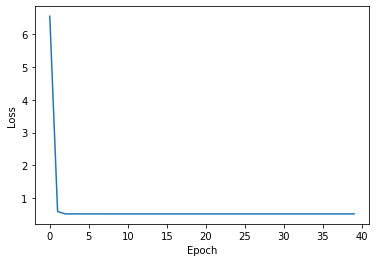

In [806]:
with DisplayLossCurve(print_loss=True):
    model_sgd.fit(scaled_train_x, train_y)

In [807]:
preds = model_sgd.predict(scaled_test_x)

In [808]:
preds

array([132.7584854 , 132.95021604, 133.00404172, ..., 132.76065918,
       132.76077258, 132.75965773])

In [809]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, preds))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, preds)))
print('R2 Score : ', metrics.r2_score(preds, test_y))

Mean Absolute Error: 18.34357413934174
Mean Squared Error: 349.43076644040275
Root Mean Squared Error: 18.69306733632559
R2 Score :  -5206.239376308242


In [810]:
model_path_2 = f'./saved_models/{crypto}/sgd.sav'
pickle.dump(model_sgd, open(model_path_2, 'wb'))

RF Regressor

In [811]:
rf_regressor = RandomForestRegressor(max_depth=5, random_state=42)

In [812]:
rf_regressor.fit(train_x, train_y)

RandomForestRegressor(max_depth=5, random_state=42)

In [813]:
rf_preds = rf_regressor.predict(test_x)

In [814]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, rf_preds))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, rf_preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, rf_preds)))
# print('R2 Score : ', metrics.r2_score(rf_preds, test_y))

Mean Absolute Error: 15.829833784900144
Mean Squared Error: 263.9907610391629
Root Mean Squared Error: 16.247792497418317


In [815]:
model_path_3 = f'./saved_models/{crypto}/rf.sav'
pickle.dump(rf_regressor, open(model_path_3, 'wb'))